In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from keras.layers import Input, Dense
from keras.models import Model

In [2]:
data = pd.read_csv('creditcard.csv')

In [36]:
data.shape

(284807, 30)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data = data.drop('Time', axis = 1)

In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud_data = data[data["Class"] == 1]
non_fraud_data = data[data["Class"] == 0]

In [10]:
X_non_fraud = non_fraud_data.drop(columns=["Class"])
y_non_fraud = non_fraud_data["Class"]

X_train, X_non_fraud_test, y_train, y_non_fraud_test = train_test_split(X_non_fraud, y_non_fraud, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(227452, 29)

In [12]:
X_test = pd.concat([X_non_fraud_test, fraud_data.drop(columns=["Class"])], axis=0)
y_test = pd.concat([y_non_fraud_test, fraud_data["Class"]], axis=0)

In [13]:
y_train.value_counts()

0    227452
Name: Class, dtype: int64

In [14]:
y_test.value_counts()

0    56863
1      492
Name: Class, dtype: int64

In [15]:
scaler = StandardScaler()

X_train["Amount"] = scaler.fit_transform(X_train["Amount"].values.reshape(-1, 1))
X_test["Amount"] = scaler.transform(X_test["Amount"].values.reshape(-1, 1))

In [16]:
input_layer = Input(shape=(X_train.shape[1],))

In [17]:
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

In [18]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

In [19]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 29)                3741  

In [21]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
889/889 [==============================] - 3s 2ms/step - loss: 0.8273
Epoch 2/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7660
Epoch 3/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7626
Epoch 4/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7493
Epoch 5/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7428
Epoch 6/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7423
Epoch 7/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7417
Epoch 8/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7423
Epoch 9/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7421
Epoch 10/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7409
Epoch 11/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7384
Epoch 12/50
889/889 [==============================] - 2s 2ms/step - loss: 0.7358
Epoch 13/50
889/889 [====

In [22]:
reconstructed = autoencoder.predict(X_test)

mse = ((X_test - reconstructed) ** 2).mean(axis=1)

mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df

1793/1793 [==============================] - 1s 729us/step


,Reconstruction_error,True_class
138028,0.150542,0
63099,0.074103,0
73411,0.482332,0
164247,0.239956,0
148999,0.767000,0
...,...,...
279863,6.304753,1
280143,3.573012,1
280149,2.817803,1
281144,6.491476,1


In [23]:
error_df.describe()

,Reconstruction_error,True_class
count,57355.000000,57355.000000
mean,0.963855,0.008578
std,9.291555,0.092221
min,0.027174,0.000000
25%,0.209136,0.000000
50%,0.368781,0.000000
75%,0.623791,0.000000
max,1854.963089,1.000000


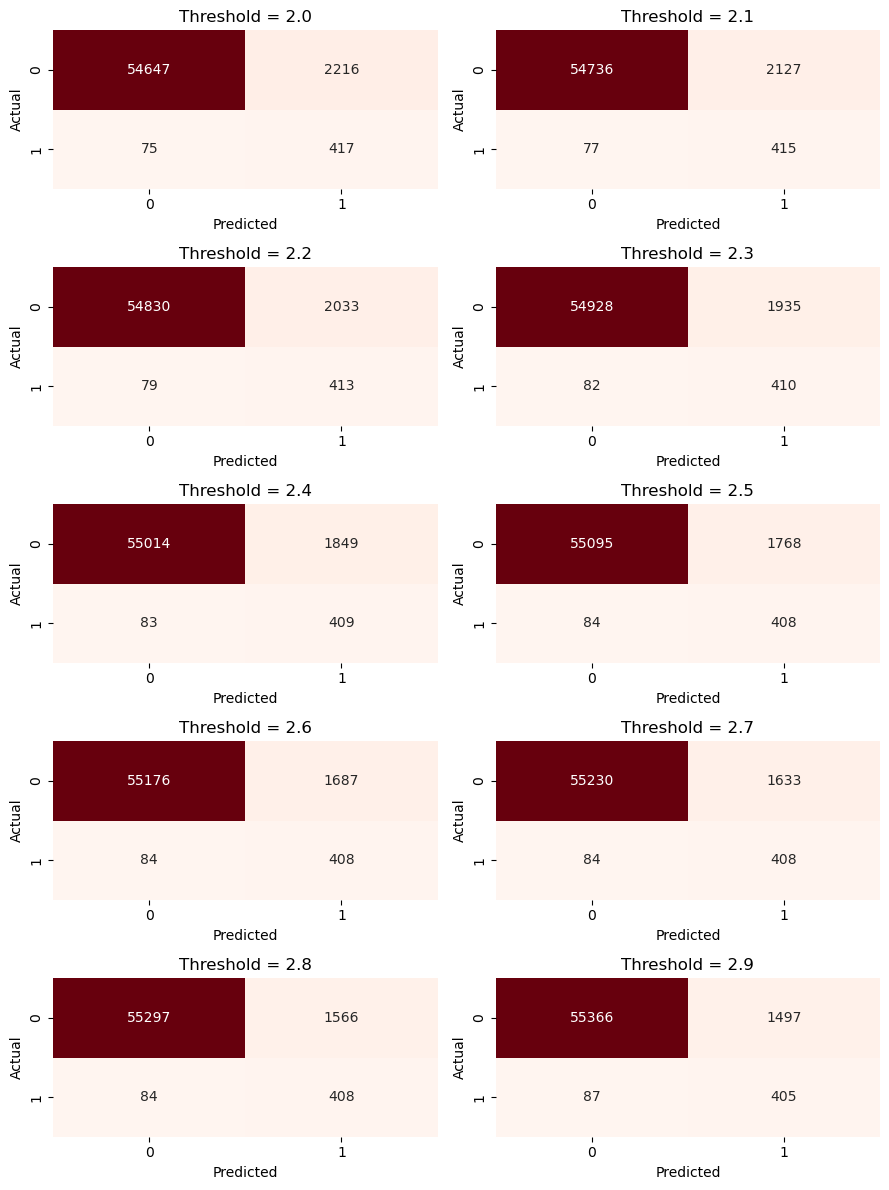

In [24]:
num_thresholds = 10

n_rows = 5
n_cols = num_thresholds // n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 12))

for i, ax in enumerate(axes.ravel()):
    if i < num_thresholds:
        threshold = (i + 20) / 10.0
        y_pred = [1 if error > threshold else 0 for error in mse]
        confusion = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False, ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title(f"Threshold = {threshold}")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [25]:
threshold = 2.9

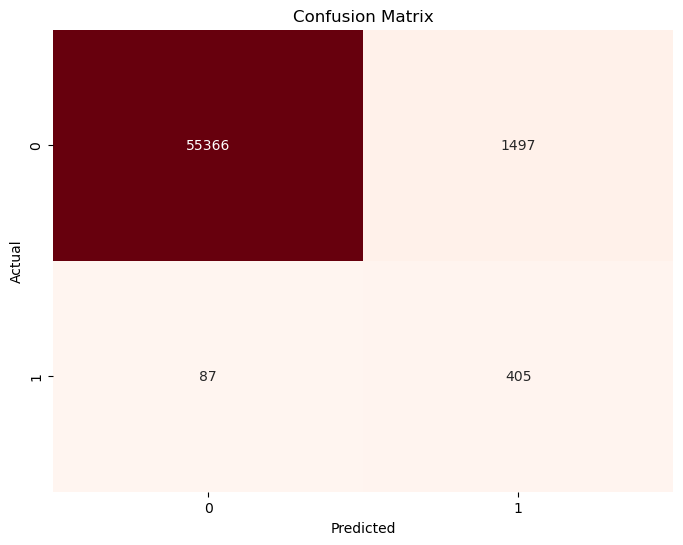

In [26]:
y_pred = [1 if error > threshold else 0 for error in mse]
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
accuracy = accuracy_score(y_test, y_pred)

In [28]:
accuracy

0.9723825298579025

In [29]:
report = classification_report(y_test, y_pred)

In [30]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.21      0.82      0.34       492

    accuracy                           0.97     57355
   macro avg       0.61      0.90      0.66     57355
weighted avg       0.99      0.97      0.98     57355



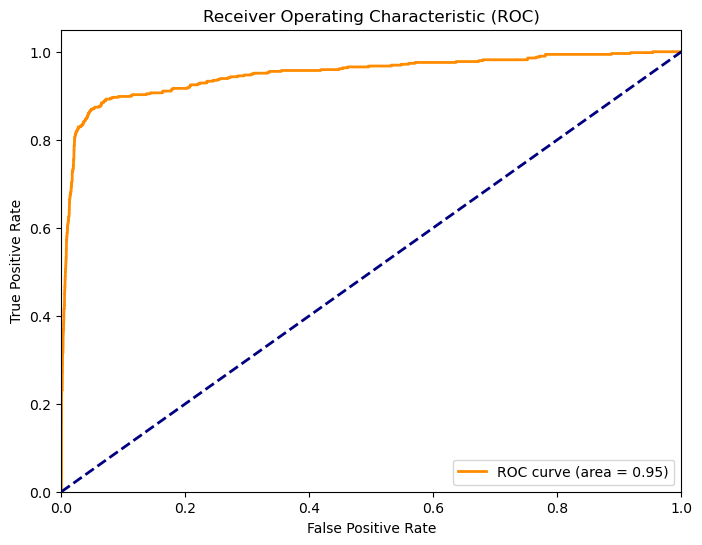

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

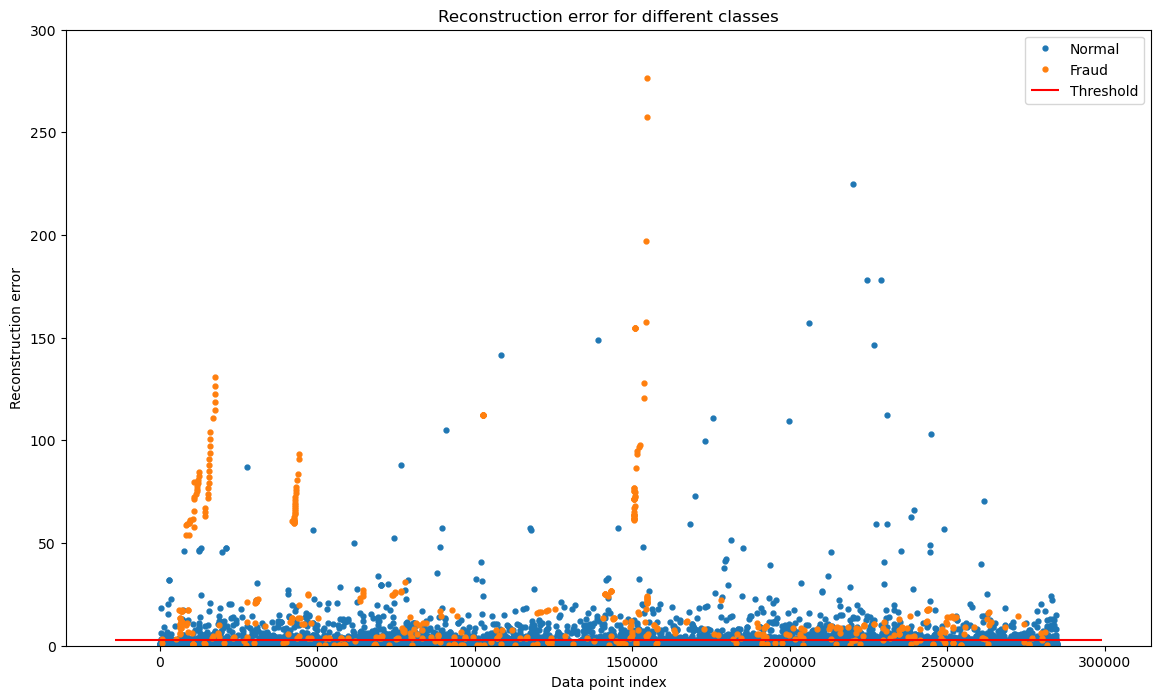

In [32]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 300);

plt.show();

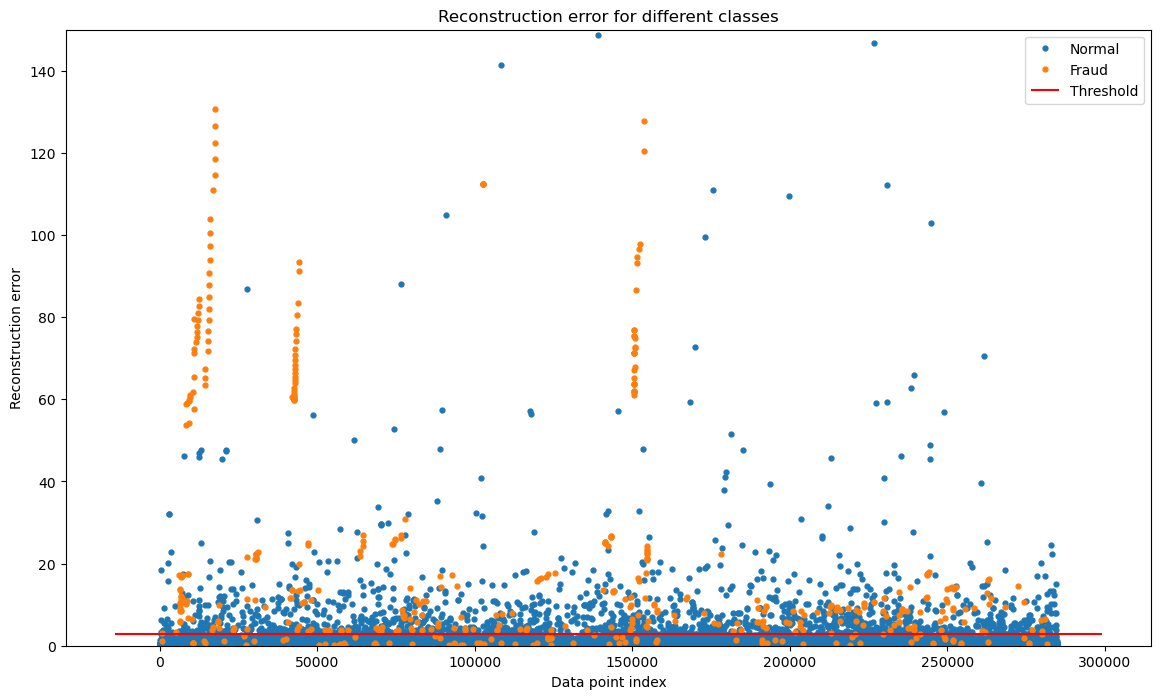

In [33]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 150);

plt.show();

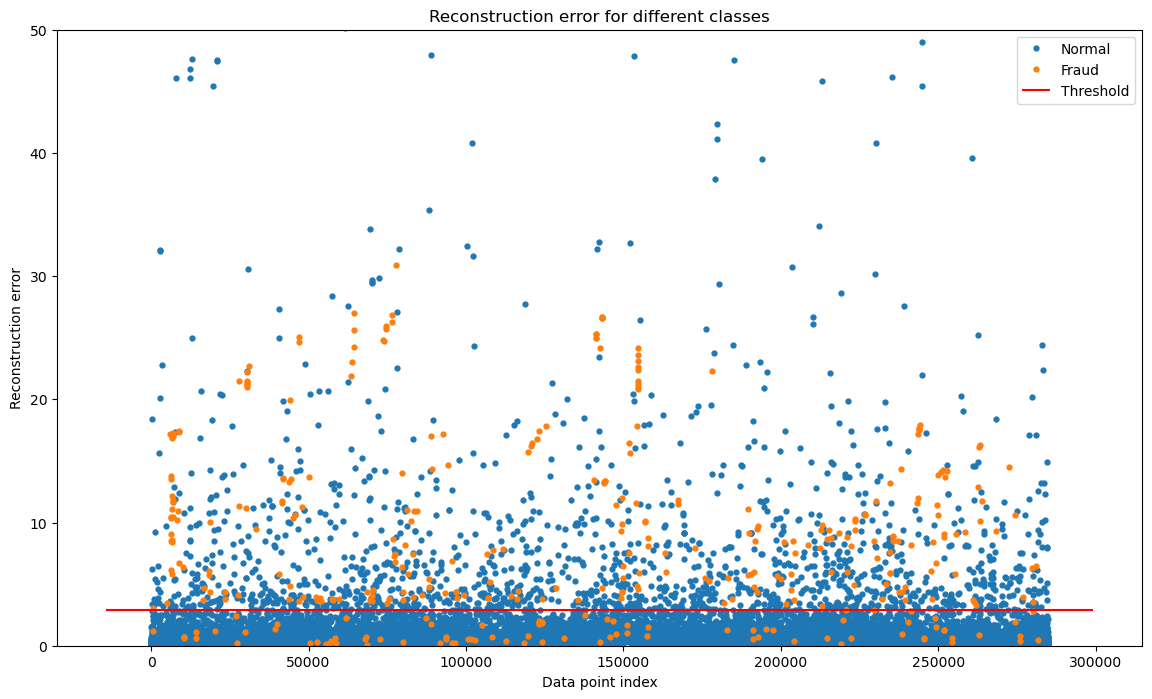

In [34]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 50);

plt.show();

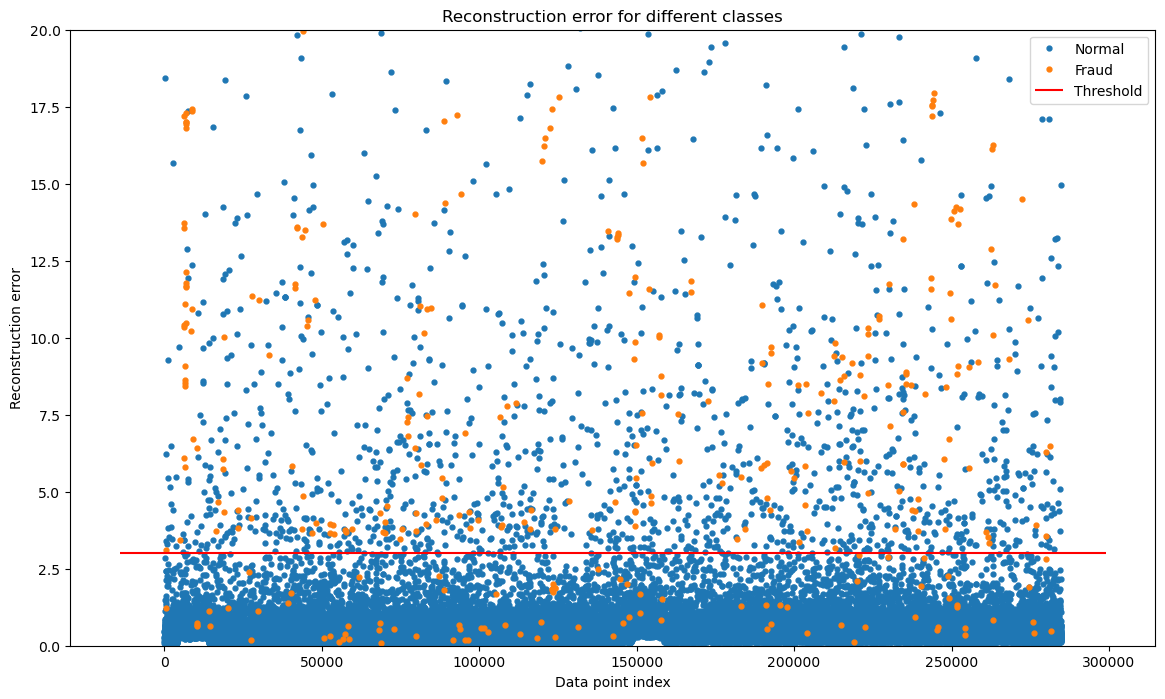

In [35]:
threshold_fixed = 3.0

groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 20);

plt.show();